In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [31]:
data_path = os.path.join("..", "data", "Blood_fat.csv")
data = np.loadtxt(data_path, delimiter=",")

In [32]:
xs = np.array(data[:, 0], dtype = np.float32)
ys = np.array(data[:, 1], dtype = np.float32)
zs = np.array(data[:, 2], dtype = np.float32)

x_data = np.array(data[:, 0:2], dtype = np.float32)
y_data = np.array(data[:, 2], dtype = np.float32)
y_data = y_data.reshape(25, 1)

In [33]:
rmsprop = RMSprop(learning_rate = 0.01)
model = Sequential()
model.add(Dense(1, input_shape = (2, )))
model.compile(loss = 'mse', optimizer = rmsprop)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [34]:
hist = model.fit(x_data, y_data, epochs = 1000)

print(hist.history.keys())

Epoch 1/1000
1/1 [==============================] - 1s 771ms/step - loss: 54177.6289
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 52602.3789
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 51483.1211
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 50559.8203
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 49750.3086
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 49016.5742
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 48337.4688
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 47699.8594
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 47094.9648
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 46516.5938
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 45960.2109
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 45422.

In [35]:
print('100kg 40세 혈중 지방 함량치 = ', model.predict(np.array([100, 40]).reshape(1, 2)))
print('60kg 25세 혈중 지방 함량치 = ', model.predict(np.array([60, 25]).reshape(1, 2)))

1/1 [==============================] - 0s 54ms/step
100kg 40세 혈중 지방 함량치 =  [[351.92664]]
1/1 [==============================] - 0s 31ms/step
60kg 25세 혈중 지방 함량치 =  [[220.45303]]


In [36]:
W_, b_ = model.get_weights()

x = x_data[:, 0]
y = x_data[:, 1]
Z = np.matmul(x_data, W_) + b_

x_l = np.linspace(np.min(x_data, axis = 0)[0], np.max(x_data, axis = 0)[0], len(x_data)).reshape(25, 1)
y_l = np.linspace(np.min(x_data, axis = 0)[1], np.max(x_data, axis = 0)[1], len(x_data)).reshape(25, 1)

print('x = ', x_l.shape)
print('y = ', y_l.shape)

X = np.concatenate((x_l, y_l), axis = 1)
print('X = ', X.shape)

Z_l = np.matmul(X, W_) + b_

x =  (25, 1)
y =  (25, 1)
X =  (25, 2)


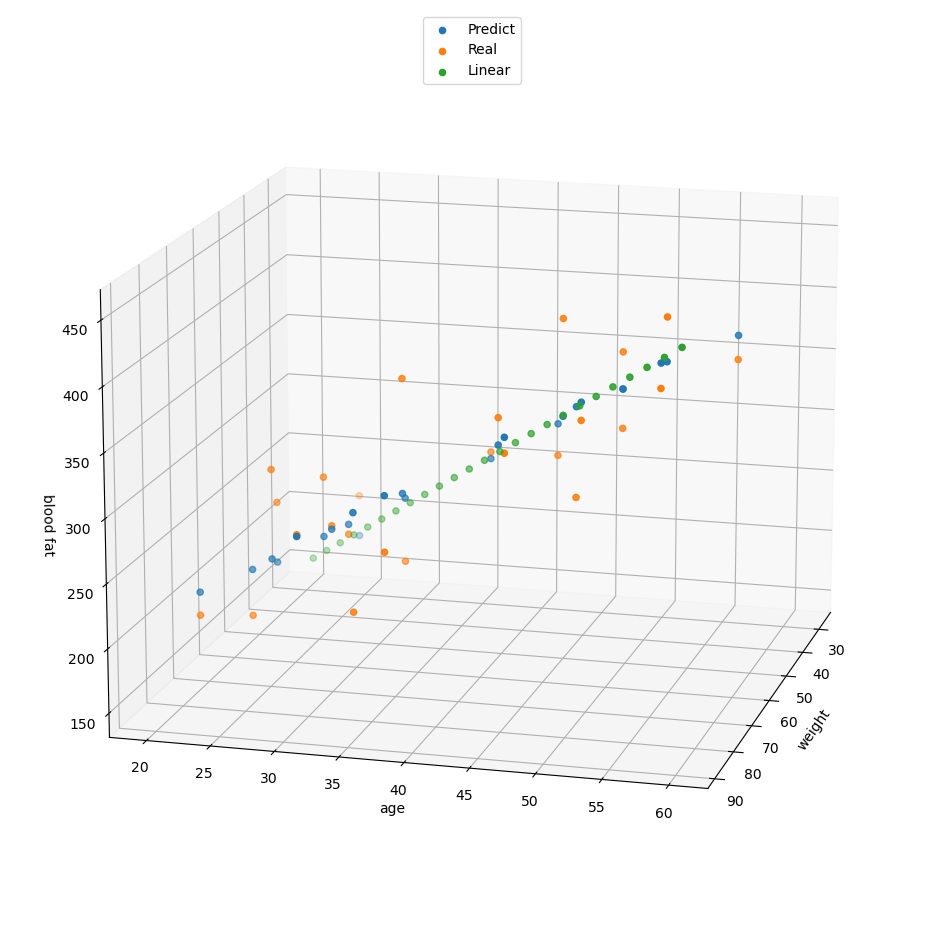

In [37]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')

Z_reshaped = Z.reshape(25)
ax.scatter(x, y, Z_reshaped, label = 'Predict')
ax.scatter(xs, ys, zs, label = 'Real')
ax.scatter(x_l, y_l, Z_l, label = 'Linear')

ax.set_xlabel('weight')
ax.set_ylabel('age')
ax.set_zlabel('blood fat')
ax.view_init(15, 15)
plt.legend(loc = 'upper center')
plt.show()